In [1]:
import torch, pickle, os
from d2l_common import show_heatmaps
def draw_ScheduleAttention(ScheduleAttention_path):
    with open(ScheduleAttention_path, 'rb') as f:
        ScheduleAttention = pickle.load(f)
    ScheduleAttention = torch.Tensor(ScheduleAttention)
    assert ScheduleAttention.shape[0] == ScheduleAttention.shape[1]
    ScheduleAttention = \
        ScheduleAttention.reshape((1, 1, ScheduleAttention.shape[0], ScheduleAttention.shape[1]))
    show_heatmaps(ScheduleAttention, "Keys", "Queries")

if __name__ == "__main__":
    intrin_name = "vnni"
    attention_save_path = '/home/zhwang/TensorizeSet/tlp_records/attention_matrix'
    attention_save_name = f'ScheduleAttention_{intrin_name}.pkl'
    ScheduleAttention_save_path = os.path.join(attention_save_path, attention_save_name)
    draw_ScheduleAttention(ScheduleAttention_save_path)

/home/zhwang/anaconda3/envs/tvm-3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'd2l'

/tmp/ipykernel_31010/515389778.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(df.columns), fontdict = fontdict_x)
/tmp/ipykernel_31010/515389778.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + list(df.index), fontdict = fontdict_y)


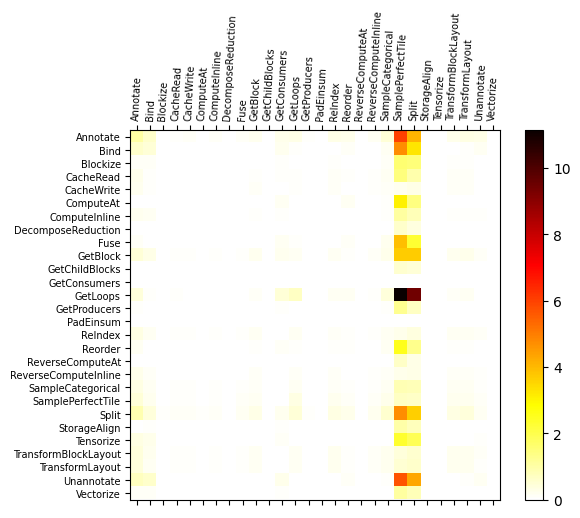

In [7]:
import torch, pickle, os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
from tlp_embedding import Embedding
def draw_Attention(ScheduleAttention_path, table_save_path, table_save_name):
    with open(ScheduleAttention_path, 'rb') as f:
        ScheduleAttention = pickle.load(f)
    embedding = Embedding(table_save_path, table_save_name).kind_embedding
    variables = []
    labels = []
    for k, v in embedding.items():
        variables.append(k)
        labels.append(k)

    df = pd.DataFrame(ScheduleAttention, columns=variables, index=labels)

    fig = plt.figure()

    ax = fig.add_subplot(111)

    cax = ax.matshow(df, interpolation='nearest', cmap='hot_r')
    fig.colorbar(cax)

    tick_spacing = 1
    ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
    fontdict_x = {'rotation': 87, 'fontsize': 7, } 
    fontdict_y = {'fontsize': 7}
    ax.set_xticklabels([''] + list(df.columns), fontdict = fontdict_x)
    ax.set_yticklabels([''] + list(df.index), fontdict = fontdict_y)

    plt.show()
    
if __name__ == "__main__":
    intrin_name = "tensorcore161616nn"
    attention_save_path = '/home/zhwang/TensorizeSet/tlp_records/attention_matrix'
    attention_save_name = f'ScheduleAttention_{intrin_name}.pkl'
    ScheduleAttention_save_path = os.path.join(attention_save_path, attention_save_name)

    table_save_path = '/home/zhwang/TensorizeSet/tlp_records/tlp_table'
    table_save_name = f'tlp_{intrin_name}_embedding_table.pkl'
    draw_Attention(ScheduleAttention_save_path, table_save_path, table_save_name)